In [6]:
from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()
import numpy as np
import pandas as pd
from pylab import plt
from math import sqrt
import time
import datetime
import datetime as dt
import pandas_datareader as web
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import talib
from talib.abstract import *
from datetime import date, timedelta
import itertools
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from itertools import combinations
import time
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.optimize import minimize, rosen, rosen_der
#pip install pycoingecko
#pip install TA-Lib/brew install ta-lib

In [38]:
def getData(id):
    end = dt.datetime.now()
    start = dt.datetime(2021,2,2)
    data = web.DataReader(id+"-USD", 'yahoo', start, end)
    data = data.rename(columns={"Open":"open","High":"high","Low":"low","Close":"close","Volume":"volume"})
    return data

def getPriceData(name,fromDate,toDate):
    fromDate = unix(fromDate)
    toDate = unix(toDate)
    data = cg.get_coin_market_chart_range_by_id(id=name,vs_currency='usd',from_timestamp=fromDate,to_timestamp=toDate)
    price = pd.DataFrame(data["prices"],columns=["Date","Price"])
    price['Date'] = pd.to_datetime(price['Date'],unit='ms')
    return price

def unix(date):
    return int(time.mktime(datetime.datetime.strptime(date, "%d/%m/%Y").timetuple()))

top100= []
for i in cg.get_coins_markets('usd')[:130]:
    top100.append(i['id'])


stablecoins = ['binance-usd','true-usd','magic-internet-money','compound-usd-coin','tether','usd-coin','terrausd','dai','frax','paxos-standard','neutrino','fei-usd']

top100 = [ x for x in top100 if x not in stablecoins]

firstfif = pd.DataFrame()
for i in top100[:50]:
    temp = getPriceData(i,"08/02/2015","22/03/2022")
    temp = temp.set_index("Date")
    firstfif[i] = temp

time.sleep(60)
secondfif = pd.DataFrame()
for i in top100[50:]:
    temp = getPriceData(i,"08/02/2015","22/03/2022")
    temp = temp.set_index("Date")
    secondfif[i] = temp

data = firstfif.join(secondfif)

In [39]:
data

,bitcoin,ethereum,binancecoin,ripple,terra-luna,cardano,solana,avalanche-2,polkadot,dogecoin,...,basic-attention-token,chiliz,convex-finance,havven,frax-share,kadena,loopring,bitdao,gatechain-token,nem
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-09,220.092200,NaN,NaN,0.014005,NaN,NaN,NaN,NaN,NaN,0.000141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-10,220.649300,NaN,NaN,0.013651,NaN,NaN,NaN,NaN,NaN,0.000140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-11,219.095600,NaN,NaN,0.013761,NaN,NaN,NaN,NaN,NaN,0.000138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-12,222.040159,NaN,NaN,0.014057,NaN,NaN,NaN,NaN,NaN,0.000141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-13,235.677400,NaN,NaN,0.014568,NaN,NaN,NaN,NaN,NaN,0.000143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,41001.709578,2817.401075,392.376208,0.793822,86.994515,0.837683,87.967688,79.697402,18.755074,0.116494,...,0.851741,0.210613,18.627577,4.375368,17.603059,6.182543,0.707903,1.126857,6.319834,0.099562
2022-03-19,41837.413138,2945.745910,397.632315,0.798457,88.369048,0.854059,89.905954,85.977000,19.013958,0.119394,...,0.842239,0.208659,19.987084,5.050969,17.781743,6.300124,0.728683,1.133216,6.358909,0.100103
2022-03-20,42201.939921,2947.226158,399.603863,0.818981,92.149632,0.901141,92.404085,89.778924,19.345968,0.123464,...,0.843380,0.210604,19.673694,5.168563,17.741914,6.313296,0.936337,1.135235,6.323292,0.101092


In [40]:
combo = list(combinations(top100,2))
adfull = []
for i in range(len(combo)):
    try:
        test= adfuller(((np.log(data[combo[i][0]])-np.log(data[combo[i][1]]))).dropna())[1]
        adfull.append([test,combo[i]])
    except:
        pass
result = pd.DataFrame(adfull,columns=["pvalue","pair"])
result.sort_values(by="pvalue").head(30)

,pvalue,pair
3657,0.000000e+00,"(arweave, apecoin)"
3757,0.000000e+00,"(apecoin, celsius-degree-token)"
3517,0.000000e+00,"(bittorrent, apecoin)"
3765,0.000000e+00,"(apecoin, chiliz)"
1966,0.000000e+00,"(okb, apecoin)"
3762,0.000000e+00,"(apecoin, celo)"
3772,0.000000e+00,"(apecoin, gatechain-token)"
3771,0.000000e+00,"(apecoin, bitdao)"
3769,0.000000e+00,"(apecoin, kadena)"
3763,0.000000e+00,"(apecoin, nexo)"


In [41]:
pairPrice = data[['ripple','tron']].dropna()
bnb = (pairPrice['ripple'].values).reshape(-1,1)
eth = (pairPrice['tron'].values).reshape(-1,1)

reg = sm.OLS(eth,bnb).fit()

def optSharpe(guess):
    lookback,sdenter,sdexit,sdloss = guess
    lookback = int(lookback)
    bands = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdenter,nbdevdn = sdenter,matype=0)).T
    bands = bands.set_index(pairPrice.index)
    bands.columns = ['1upper','1mid','1lower']

    bands2 = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdexit,nbdevdn = sdexit,matype=0)).T
    bands2 = bands2.set_index(pairPrice.index)
    bands2.columns = ['upper','mid','lower']

    bands3 = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdloss,nbdevdn = sdloss,matype=0)).T
    bands3 = bands3.set_index(pairPrice.index)
    bands3.columns = ['upper2','mid2','lower2']
    bbands = bands2.join(bands)
    bbands = bbands.join(bands3)

    bbands["spread"] = reg.resid
    bbands = bbands.drop(columns = ['mid','1mid','mid2'])

    bbands[['bnb','eth']] = pairPrice
    bbands['hedge'] = reg.params[0]

    bbands.loc[bbands['spread']>bbands['1upper'],'position']=-1
    bbands.loc[(bbands['spread']<bbands['upper']) & (bbands['spread']>bbands['lower']),'position']=0
    bbands.loc[bbands['spread']<bbands['1lower'],'position']=1
    bbands.loc[(bbands["spread"]<bbands["lower2"]) | (bbands["spread"]>bbands["upper2"]),'position']=0
    bbands = bbands.ffill().dropna()



    bbands.loc[bbands['position'].diff()!=0,"ethsize"] = bbands["eth"]/(bbands["bnb"]*bbands["hedge"]+bbands["eth"])
    bbands['bnbsize'] = 1-bbands['ethsize']
    bbands['oposition'] = -1*bbands["position"]
    bbands[['bnbdiff','ethdiff']] = bbands[['bnb','eth']].diff()
    bbands = bbands.ffill()

    protfolio = []
    size = []
    cap = 10000
    position = np.array([0,0])
    highest = cap 
    for i in range(len(bbands)):
        # if cap>highest:
        #     highest = cap
        if (bbands["position"][i]!=0):
            if (position==[0,0]).all():
                position = np.array([bbands["position"][i]*cap*bbands["ethsize"][i]/bbands['eth'][i],bbands["oposition"][i]*cap*bbands["bnbsize"][i]/bbands['bnb'][i]])
                protfolio.append(cap)
                size.append(position)
            else:
                # if cap<highest*.8:
                #     highest = cap
                #     cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                #     position = np.array([0,0])
                #     protfolio.append(cap)
                #     size.append(position)
                cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                protfolio.append(cap)
                size.append(position)

        else:
            if (position!=[0,0]).all():
                cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                position = np.array([0,0])
                protfolio.append(cap)
                size.append(position)
            else:
                protfolio.append(cap)
                size.append(position)
    bbands["portfolio"] = protfolio
    bbands[["ethamt","bnbamt"]] = size

    bbands["pnl"] = bbands["portfolio"].pct_change()
    try:   
        sharpe = math.sqrt(len(bbands))*bbands["pnl"].mean()/bbands["pnl"].std()
    except :
        return 0
        

    return sharpe

In [52]:
pairPrice

,ripple,tron
Date,,
2017-11-09,0.217419,0.002387
2017-11-10,0.206187,0.002044
2017-11-11,0.210117,0.001915
2017-11-12,0.196401,0.001804
2017-11-13,0.203654,0.002018
...,...,...
2022-03-18,0.793822,0.060860
2022-03-19,0.798457,0.061785
2022-03-20,0.818981,0.061876


In [53]:
ma= np.linspace(500,10,20)
enter = np.linspace(4,0.1,7)
exit = np.linspace(4,0.1,7)
loss = np.linspace(5,0.1,7)
combo = []
for i in range(len(ma)):
    for j in range(len(enter)):
        for k in range(len(exit)): 
            for l in range(len(loss)): 
                if (loss[l]>enter[j]>exit[k]) :
                    combo.append([ma[i],enter[j],exit[k],loss[l]])
len(combo)

1340

In [54]:
start= time.time()
result = []
for i in combo:
    result.append(optSharpe(i))



end = time.time()
print((end-start)/60)

2.8133825500806173


In [55]:
sharpe = pd.DataFrame(combo)
sharpe["ratio"] = result
sharpe.sort_values(by= "ratio",ascending=False).head(20)

,0,1,2,3,ratio
1189,61.578947,2.05,0.10,2.550000,3.224251
1177,61.578947,2.70,0.10,3.366667,3.060874
63,500.000000,0.75,0.10,3.366667,2.985459
1188,61.578947,2.05,0.10,3.366667,2.894096
645,267.894737,2.05,1.40,2.550000,2.835918
712,242.105263,2.05,1.40,2.550000,2.761402
1176,61.578947,2.70,0.10,4.183333,2.748120
58,500.000000,1.40,0.10,3.366667,2.736520
1127,87.368421,1.40,0.75,1.733333,2.673756
9,500.000000,4.00,0.75,4.183333,2.657424


In [56]:
def pnl(guess):
    lookback,sdenter,sdexit,sdloss = guess
    lookback = int(lookback)
    bands = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdenter,nbdevdn = sdenter,matype=1)).T
    bands = bands.set_index(pairPrice.index)
    bands.columns = ['1upper','1mid','1lower']

    bands2 = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdexit,nbdevdn = sdexit,matype=1)).T
    bands2 = bands2.set_index(pairPrice.index)
    bands2.columns = ['upper','mid','lower']

    bands3 = pd.DataFrame(BBANDS(reg.resid,timeperiod=lookback,nbdevup=sdloss,nbdevdn = sdloss,matype=1)).T
    bands3 = bands3.set_index(pairPrice.index)
    bands3.columns = ['upper2','mid2','lower2']
    bbands = bands2.join(bands)
    bbands = bbands.join(bands3)

    bbands["spread"] = reg.resid
    bbands = bbands.drop(columns = ['mid','1mid','mid2'])

    bbands[['bnb','eth']] = pairPrice
    bbands['hedge'] = reg.params[0]

    bbands.loc[bbands['spread']>bbands['1upper'],'position']=-1
    bbands.loc[(bbands['spread']<bbands['upper']) & (bbands['spread']>bbands['lower']),'position']=0
    bbands.loc[bbands['spread']<bbands['1lower'],'position']=1
    bbands.loc[(bbands["spread"]<bbands["lower2"]) | (bbands["spread"]>bbands["upper2"]),'position']=0
    bbands = bbands.ffill().dropna()



    bbands.loc[bbands['position'].diff()!=0,"ethsize"] = bbands["eth"]/(bbands["bnb"]*bbands["hedge"]+bbands["eth"])
    bbands['bnbsize'] = 1-bbands['ethsize']
    bbands['oposition'] = -1*bbands["position"]
    bbands[['bnbdiff','ethdiff']] = bbands[['bnb','eth']].diff()
    bbands = bbands.ffill()

    protfolio = []
    size = []
    cap = 1000
    position = np.array([0,0])
    highest = cap 
    for i in range(len(bbands)):
        # if cap>highest:
        #     highest = cap
        if (bbands["position"][i]!=0):
            if (position==[0,0]).all():
                position = np.array([bbands["position"][i]*cap*bbands["ethsize"][i]/bbands['eth'][i],bbands["oposition"][i]*cap*bbands["bnbsize"][i]/bbands['bnb'][i]])
                protfolio.append(cap)
                size.append(position)
            else:
                # if cap<highest*.8:
                #     highest = cap
                #     cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                #     position = np.array([0,0])
                #     protfolio.append(cap)
                #     size.append(position)
                cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                protfolio.append(cap)
                size.append(position)

        else:
            if (position!=[0,0]).all():
                cap = cap + (position*np.array((bbands["ethdiff"][i],bbands["bnbdiff"][i]))).sum()
                position = np.array([0,0])
                protfolio.append(cap)
                size.append(position)
            else:
                protfolio.append(cap)
                size.append(position)
    bbands["portfolio"] = protfolio
    bbands[["ethamt","bnbamt"]] = size

    bbands["pnl"] = bbands["portfolio"].pct_change()
    try:   
        sharpe = math.sqrt(len(bbands))*bbands["pnl"].mean()/bbands["pnl"].std()
    except :
        return 0
        

    return bbands

<AxesSubplot:xlabel='Date'>

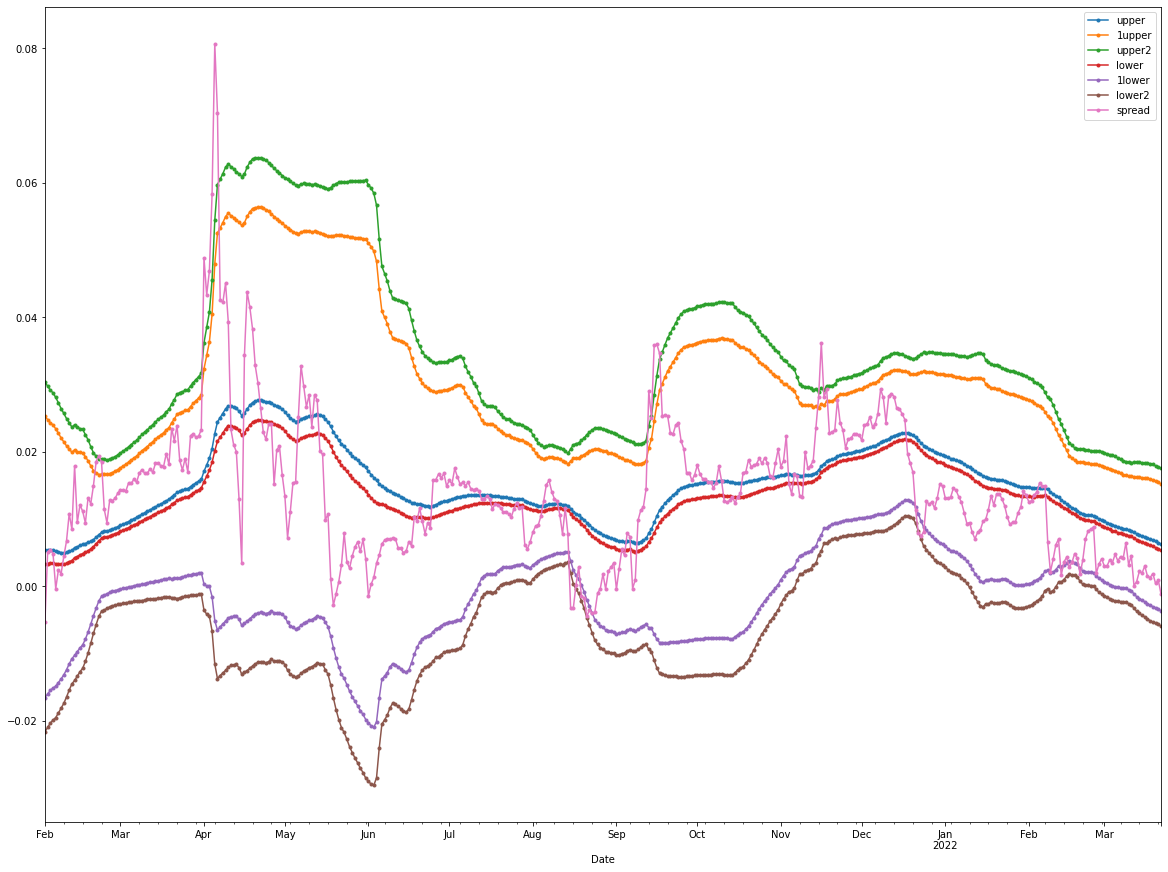

In [57]:
sortedSharpe = sharpe.sort_values(by= "ratio",ascending=False)
pnl(sharpe.loc[sortedSharpe.index[0]][0:4])["2021-02-01":].plot(y=["upper","1upper","upper2","lower","1lower","lower2","spread"],figsize = (20,15),style='.-')

In [58]:
sharpe.loc[sortedSharpe.index[0]][0:4]

0    61.578947
1     2.050000
2     0.100000
3     2.550000
Name: 1189, dtype: float64

In [59]:
bbands = pnl(sharpe.loc[sortedSharpe.index[0]][0:4])
bbands[(bbands['position'].diff()!=0)]

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2018-01-11,-0.028657,-0.035317,0.036274,-0.100249,0.052923,-0.116898,-0.030932,1.933610,0.114172,0.075043,0.0,0.440350,0.559650,-0.0,NaN,NaN,1000.000000,0.000000,0.000000,NaN
2018-03-21,-0.026455,-0.027645,-0.014858,-0.039243,-0.011884,-0.042217,-0.014799,0.704110,0.038040,0.075043,-1.0,0.418581,0.581419,1.0,-0.030460,0.005092,1000.000000,-11003.677446,825.750190,0.000000
2018-03-24,-0.024854,-0.026228,-0.011462,-0.039620,-0.008028,-0.043054,-0.006617,0.637919,0.041254,0.075043,0.0,0.462878,0.537122,-0.0,-0.022280,0.003512,909.973731,0.000000,0.000000,-0.058993
2018-03-28,-0.021491,-0.023380,-0.003066,-0.041805,0.001658,-0.046529,0.000004,0.579457,0.043488,0.075043,-1.0,0.500023,0.499977,1.0,-0.021158,-0.001231,909.973731,-10462.766999,785.158587,0.000000
2018-03-29,-0.020527,-0.022563,-0.000683,-0.042407,0.004405,-0.047496,0.005169,0.578339,0.048569,0.075043,0.0,0.528101,0.471899,-0.0,-0.001118,0.005081,855.935650,0.000000,0.000000,-0.059384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,0.022124,0.021161,0.031515,0.011770,0.033923,0.009362,0.011388,0.887032,0.077954,0.075043,1.0,0.539401,0.460599,-1.0,0.050951,-0.001736,1835.756109,-8766.591200,657.872278,0.027275
2021-12-22,0.021710,0.020688,0.031671,0.010728,0.034225,0.008174,0.007906,0.950544,0.079238,0.075043,0.0,0.526254,0.473746,-0.0,0.063512,0.001284,1866.284780,0.000000,0.000000,0.016630
2021-12-23,0.021296,0.020216,0.031827,0.009685,0.034527,0.006985,0.007462,0.958127,0.079363,0.075043,1.0,0.524667,0.475333,-1.0,0.007583,0.000125,1866.284780,12337.921302,-925.876000,0.000000


In [60]:
bbands

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2018-01-11,-0.028657,-0.035317,0.036274,-0.100249,0.052923,-0.116898,-0.030932,1.933610,0.114172,0.075043,0.0,0.440350,0.559650,-0.0,NaN,NaN,1000.000000,0.000000,0.00000,NaN
2018-01-12,-0.028799,-0.035438,0.035932,-0.100169,0.052530,-0.116767,-0.036056,2.025770,0.115964,0.075043,0.0,0.440350,0.559650,-0.0,0.092160,0.001792,1000.000000,0.000000,0.00000,0.000000
2018-01-13,-0.029147,-0.035768,0.035415,-0.100330,0.051969,-0.116884,-0.042630,2.022500,0.109144,0.075043,0.0,0.440350,0.559650,-0.0,-0.003270,-0.006820,1000.000000,0.000000,0.00000,0.000000
2018-01-14,-0.029741,-0.036354,0.034732,-0.100826,0.051263,-0.117358,-0.050743,1.865610,0.089259,0.075043,0.0,0.440350,0.559650,-0.0,-0.156890,-0.019886,1000.000000,0.000000,0.00000,0.000000
2018-01-15,-0.030124,-0.036718,0.034171,-0.101014,0.050657,-0.117500,-0.044633,1.667060,0.080469,0.075043,0.0,0.440350,0.559650,-0.0,-0.198550,-0.008790,1000.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,0.006995,0.006078,0.015940,-0.002867,0.018234,-0.005161,0.001289,0.793822,0.060860,0.075043,1.0,0.506414,0.493586,-1.0,-0.000558,-0.000243,1943.466284,15542.776972,-1166.37834,-0.001608
2022-03-19,0.006846,0.005926,0.015813,-0.003041,0.018112,-0.005340,0.001867,0.798457,0.061785,0.075043,1.0,0.506414,0.493586,-1.0,0.004635,0.000925,1952.441220,15542.776972,-1166.37834,0.004618
2022-03-20,0.006652,0.005734,0.015604,-0.003217,0.017899,-0.005513,0.000417,0.818981,0.061876,0.075043,1.0,0.506414,0.493586,-1.0,0.020523,0.000091,1929.914361,15542.776972,-1166.37834,-0.011538


In [61]:
optSharpe([10.000000,2.0,1.1,3.3])

0.8536183323765384

In [20]:
optSharpe([10.000000,2.0,1.1,3.3])

0.8439709267075917

In [50]:
pnl([10.000000,2.050,1.1,5.3])

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2017-11-21,-0.013536,-0.015724,-0.012591,-0.016669,-0.009359,-0.019902,-0.015345,0.232854,0.002130,0.075043,0.0,0.108631,0.891369,-0.0,NaN,NaN,1000.000000,0.000000,0.00000,NaN
2017-11-22,-0.013803,-0.015800,-0.012941,-0.016663,-0.009991,-0.019613,-0.015575,0.238634,0.002333,0.075043,0.0,0.108631,0.891369,-0.0,0.005780,0.000204,1000.000000,0.000000,0.00000,0.0
2017-11-23,-0.014100,-0.016031,-0.013267,-0.016865,-0.010414,-0.019718,-0.016254,0.245077,0.002138,0.075043,0.0,0.108631,0.891369,-0.0,0.006443,-0.000195,1000.000000,0.000000,0.00000,0.0
2017-11-24,-0.014454,-0.016122,-0.013734,-0.016843,-0.011270,-0.019307,-0.016289,0.244660,0.002071,0.075043,0.0,0.108631,0.891369,-0.0,-0.000417,-0.000067,1000.000000,0.000000,0.00000,0.0
2017-11-25,-0.014836,-0.016358,-0.014179,-0.017016,-0.011930,-0.019265,-0.016988,0.253218,0.002015,0.075043,0.0,0.108631,0.891369,-0.0,0.008558,-0.000056,1000.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18,0.004313,0.000336,0.006030,-0.001381,0.011904,-0.007256,0.001289,0.793822,0.060860,0.075043,0.0,0.509532,0.490468,-0.0,-0.000558,-0.000243,645.621764,0.000000,0.00000,0.0
2022-03-19,0.003594,0.000889,0.004762,-0.000280,0.008758,-0.004276,0.001867,0.798457,0.061785,0.075043,0.0,0.509532,0.490468,-0.0,0.004635,0.000925,645.621764,0.000000,0.00000,0.0
2022-03-20,0.003286,0.000533,0.004475,-0.000656,0.008543,-0.004724,0.000417,0.818981,0.061876,0.075043,0.0,0.509532,0.490468,-0.0,0.020523,0.000091,645.621764,0.000000,0.00000,0.0


In [22]:
bbands = pnl([391,4.0,0.1,5.0])
bbands[(bbands['position'].diff()!=0)]

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2018-12-06,-0.008903,-0.013232,0.075516,-0.097651,0.097162,-0.119296,-0.011532,0.340030,0.013980,0.075029,0.0,0.353988,0.646012,-0.0,NaN,NaN,1000.000000,0.000000,0.000000,NaN
2020-09-02,0.000138,-0.000373,0.010104,-0.010339,0.012659,-0.012895,0.012611,0.294619,0.034716,0.075029,-1.0,0.610970,0.389030,1.0,0.012186,0.005366,1000.000000,-17599.257177,1320.450676,0.000000
2020-09-03,0.000221,-0.000311,0.010610,-0.010700,0.013274,-0.013364,0.014100,0.275095,0.034740,0.075029,0.0,0.627304,0.372696,-0.0,-0.019524,0.000025,973.787325,0.000000,0.000000,-0.026213
2020-09-07,0.000603,-0.000034,0.013033,-0.012464,0.016220,-0.015652,0.013730,0.239487,0.031698,0.075029,-1.0,0.638218,0.361782,1.0,0.002362,0.001720,973.787325,-19606.555194,1471.055784,0.000000
2020-11-20,0.003110,0.002273,0.019434,-0.014051,0.023619,-0.018236,0.003069,0.302960,0.025799,0.075029,0.0,0.531617,0.468383,-0.0,0.008816,-0.001062,1182.810316,0.000000,0.000000,0.029411
2020-11-25,0.002864,0.001992,0.019858,-0.015001,0.024215,-0.019359,-0.016921,0.691962,0.034996,0.075029,1.0,0.402657,0.597343,-1.0,0.079904,0.003516,1182.810316,13609.084007,-1021.072878,0.000000
2021-02-06,0.002527,0.001296,0.026536,-0.022712,0.032692,-0.028868,0.002436,0.450901,0.036267,0.075029,0.0,0.517379,0.482621,-0.0,0.003069,0.003040,1446.244808,0.000000,0.000000,0.027161
2021-04-02,0.006519,0.004843,0.039205,-0.027843,0.047586,-0.036224,0.043331,0.570618,0.086144,0.075029,-1.0,0.668007,0.331993,1.0,-0.003201,-0.005759,1446.244808,-11214.955936,841.444386,0.000000
2021-04-04,0.007065,0.005253,0.042405,-0.030087,0.051467,-0.039149,0.058332,0.577288,0.101645,0.075029,0.0,0.701202,0.298798,-0.0,-0.027210,0.009396,1278.014212,0.000000,0.000000,-0.091211


In [23]:
bbands

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2018-12-06,-0.008903,-0.013232,0.075516,-0.097651,0.097162,-0.119296,-0.011532,0.340030,0.013980,0.075029,0.0,0.353988,0.646012,-0.0,NaN,NaN,1000.000000,0.0,0.0,NaN
2018-12-07,-0.008899,-0.013228,0.075518,-0.097645,0.097163,-0.119291,-0.010350,0.307456,0.012718,0.075029,0.0,0.353988,0.646012,-0.0,-0.032573,-0.001262,1000.000000,0.0,0.0,0.0
2018-12-08,-0.008891,-0.013220,0.075525,-0.097636,0.097170,-0.119282,-0.009509,0.301739,0.013130,0.075029,0.0,0.353988,0.646012,-0.0,-0.005717,0.000412,1000.000000,0.0,0.0,0.0
2018-12-09,-0.008884,-0.013213,0.075531,-0.097628,0.097176,-0.119273,-0.009597,0.304723,0.013266,0.075029,0.0,0.353988,0.646012,-0.0,0.002984,0.000136,1000.000000,0.0,0.0,0.0
2018-12-10,-0.008877,-0.013206,0.075537,-0.097621,0.097182,-0.119266,-0.009817,0.309820,0.013428,0.075029,0.0,0.353988,0.646012,-0.0,0.005097,0.000162,1000.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,0.013249,0.011170,0.053799,-0.029380,0.064196,-0.039777,0.004419,0.726824,0.058952,0.075029,0.0,0.701202,0.298798,-0.0,-0.029046,-0.001539,1278.014212,0.0,0.0,0.0
2022-03-08,0.013210,0.011128,0.053807,-0.029470,0.064217,-0.039880,0.004177,0.724152,0.058509,0.075029,0.0,0.701202,0.298798,-0.0,-0.002672,-0.000443,1278.014212,0.0,0.0,0.0
2022-03-09,0.013181,0.011098,0.053793,-0.029514,0.064206,-0.039927,0.006481,0.720653,0.060551,0.075029,0.0,0.701202,0.298798,-0.0,-0.003499,0.002041,1278.014212,0.0,0.0,0.0


In [24]:
4.294576*137.326652 + 30.337672*(13.632378*2-14.484806)

977.4736751159519

In [25]:
1000+4.294576*-0.540509+(-30.337672*0.429802)

984.639550919872

In [26]:
14.484806-13.632378

0.8524280000000015

In [27]:
bbands["2021-04-14":"2021-04-22"]

,upper,lower,1upper,1lower,upper2,lower2,spread,bnb,eth,hedge,position,ethsize,bnbsize,oposition,bnbdiff,ethdiff,portfolio,ethamt,bnbamt,pnl
Date,,,,,,,,,,,,,,,,,,,,
2021-04-14,0.008930,0.006712,0.052172,-0.036530,0.063260,-0.047618,0.012983,1.787873,0.147125,0.075029,0.0,0.701202,0.298798,-0.0,0.324461,0.017292,1278.014212,0.0,0.0,0.0
2021-04-15,0.008907,0.006690,0.052134,-0.036537,0.063218,-0.047621,0.003417,1.837677,0.141296,0.075029,0.0,0.701202,0.298798,-0.0,0.049804,-0.005829,1278.014212,0.0,0.0,0.0
2021-04-16,0.009051,0.006817,0.052627,-0.036759,0.063801,-0.047932,0.034346,1.757091,0.166178,0.075029,0.0,0.701202,0.298798,-0.0,-0.080586,0.024882,1278.014212,0.0,0.0,0.0
2021-04-17,0.009250,0.006984,0.053445,-0.037211,0.064777,-0.048543,0.043779,1.569349,0.161525,0.075029,0.0,0.701202,0.298798,-0.0,-0.187742,-0.004653,1278.014212,0.0,0.0,0.0
2021-04-18,0.009434,0.007141,0.054163,-0.037588,0.065632,-0.049057,0.041565,1.548317,0.157733,0.075029,0.0,0.701202,0.298798,-0.0,-0.021032,-0.003792,1278.014212,0.0,0.0,0.0
2021-04-19,0.009599,0.007283,0.054759,-0.037877,0.066338,-0.049457,0.038312,1.410772,0.144161,0.075029,0.0,0.701202,0.298798,-0.0,-0.137545,-0.013572,1278.014212,0.0,0.0,0.0
2021-04-20,0.009731,0.007400,0.055177,-0.038046,0.066830,-0.049699,0.032856,1.314891,0.131511,0.075029,0.0,0.701202,0.298798,-0.0,-0.095881,-0.012650,1278.014212,0.0,0.0,0.0
2021-04-21,0.009847,0.007505,0.055519,-0.038167,0.067230,-0.049878,0.030274,1.377135,0.133599,0.075029,0.0,0.701202,0.298798,-0.0,0.062244,0.002089,1278.014212,0.0,0.0,0.0
2021-04-22,0.009942,0.007593,0.055766,-0.038231,0.067516,-0.049981,0.026588,1.306789,0.124634,0.075029,0.0,0.701202,0.298798,-0.0,-0.070346,-0.008965,1278.014212,0.0,0.0,0.0
